No handles with labels found to put in legend.


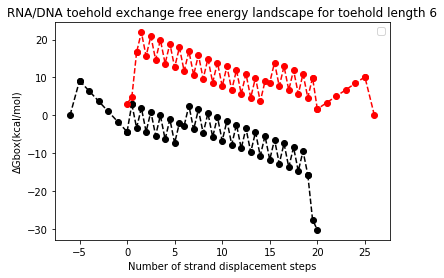

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#define the dGbox
g = 6
b = 20
g2 = 6
#position of the mismatch
m = 6

R = 1.987/1000
temp = 298.15 
dGvol = 9.95 
dGassoc = 1.90
dGbp = -1.7
dGp = 2.0 
dGs= 5.3 
#downhill slope 
dGrd = - 1
#mismatch penalty/benefit 
dGmm = 5.6
k_uni = 7.5*10**7
k_bi = 3*10**6


dGboxA = 0 
dGboxB1 = dGassoc + dGvol + dGbp + dGrd
dGboxBr = np.empty(g)
for to in range(g):
    #hybridisation of each base pair in the toehold is associated with dGbp as for DNA/DNA and now also an addition -1 for dGrd
    dGboxBr[to] = dGboxB1 + (dGbp + dGrd)*to
dGboxC1 = dGassoc + dGvol + (dGbp + dGrd)*g 
dGboxCh1 = dGboxC1 + dGp + dGs
dGboxCr = np.empty(m)
dGboxCh = np.empty(m)
dGboxCham = np.empty(b-m-1)
dGboxCram = np.empty(b-m-1)
for br in range(m):
    dGboxCh[br] = dGboxCh1 + dGrd*br
    dGboxCr[br] = dGboxCh[br] - dGs + dGrd
    dGboxCrm = dGboxCr[m-1] + dGs + (dGmm - dGs)
for br in range(m, b-1):   
    dGboxCham[br-m] = dGboxCrm + dGs + dGrd*(br-m)
    dGboxCram[br-m] = dGboxCham[br-m] - dGs + dGrd
dGboxD = dGboxCrm + dGrd*(b-m-1)
dGboxE = dGboxD - dGassoc - dGvol 
dGboxF = dGboxE + dGbp + dGrd

dGboxC = np.empty(b*2)
dGboxC[0:m*2] = [i for j in zip(dGboxCh, dGboxCr) for i in j]
dGboxC[m*2-1] = dGboxCrm
dGboxC[m*2:(b-1)*2] = [i for j in zip(dGboxCham, dGboxCram) for i in j]
dGboxAB1 = [dGboxA, dGboxB1] 
dGboxC1Ch1 = [dGboxC1, dGboxCh1]

dGboxAinc= 0
dGboxB1inc = dGassoc + dGvol + dGbp
dGboxBrinc = np.empty(g2)
for to in range(g2): 
    dGboxBrinc [to] = dGboxB1inc + dGbp*to
dGboxC1inc = dGassoc + dGvol + dGbp*g2
dGboxCh1inc = dGboxC1inc + dGp + dGs - dGrd
dGboxCrinc = np.empty(m-1)
dGboxChinc = np.empty(m-1)
dGboxCrincam = np.empty(b-m)
dGboxChincam = np.empty(b-m)
for br in range(m-1): 
    dGboxChinc[br] = dGboxCh1inc - dGrd*br
    dGboxCrinc[br] = dGboxChinc[br] - dGs
    dGboxChincm = dGboxCrinc[m-2] + dGmm - (dGs) #- dGrd)
for br in range(m-1, b-1): 
    dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
    dGboxCrincam[br-(m-1)] = dGboxChincam[br-(m-1)] - dGs
dGboxDinc = dGboxChincm - dGs - (dGrd)*(b-m -1)
dGboxEinc = dGboxDinc - dGvol - dGassoc
dGboxFinc = dGboxEinc + dGbp


dGboxCinc = np.empty(b*2)
dGboxCinc[0:(m-1)*2] = [i for j in zip(dGboxChinc, dGboxCrinc) for i in j]
dGboxCinc[(m-1)*2:(b-1)*2] = [i for j in zip(dGboxChincam, dGboxCrincam) for i in j]
dGboxAB1inc = [dGboxAinc, dGboxB1inc] 
dGboxC1Ch1inc = [dGboxC1inc, dGboxCh1inc]

plt.figure()
plt.plot(range(-g,-g+2), dGboxAB1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black' )
plt.plot(range(-g+1,1), dGboxBr, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(0, 1, 0.5), dGboxC1Ch1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(0.5, b-0.5, 0.5), dGboxC[0:(b-1)*2], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot([b-1, b-0.5, b], [dGboxD, dGboxE, dGboxF],'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')

plt.plot(range(b+g2,b+g2-2, -1), dGboxAB1inc, 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red' )
plt.plot(range(b+g2-1,b-1, -1), dGboxBrinc, 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
plt.plot(np.arange(b, b-1, -0.5), dGboxC1Ch1inc, 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
plt.plot(np.arange(b-0.5, 0.5, -0.5), dGboxCinc[0:(b-1)*2], 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
plt.plot([1, 0.5, 0], [dGboxDinc, dGboxEinc, dGboxFinc],'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')

plt.xlabel('Number of strand displacement steps')
plt.ylabel('\u0394Gbox(kcal/mol)')
plt.title('RNA/DNA toehold exchange free energy landscape for toehold length ' + str(g))
plt.legend()
plt.show()


No handles with labels found to put in legend.


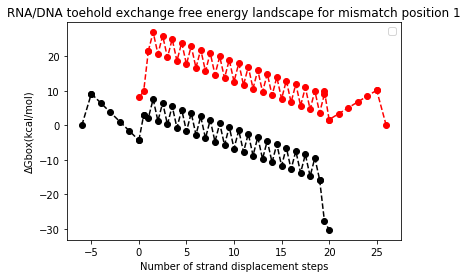

No handles with labels found to put in legend.


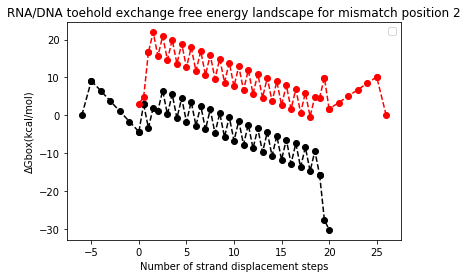

No handles with labels found to put in legend.


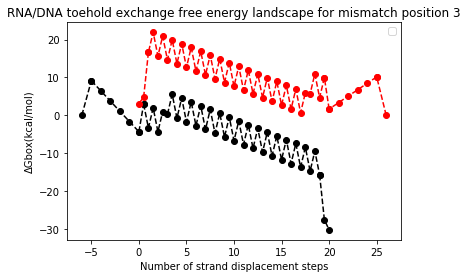

No handles with labels found to put in legend.


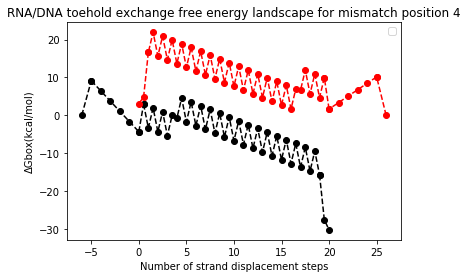

No handles with labels found to put in legend.


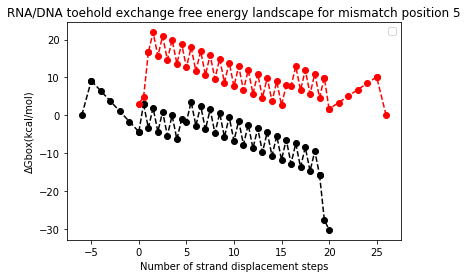

No handles with labels found to put in legend.


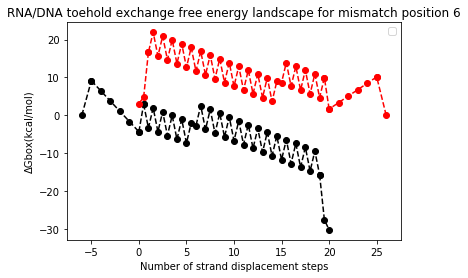

No handles with labels found to put in legend.


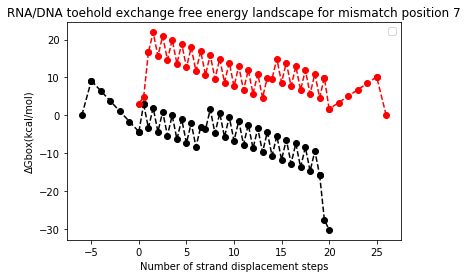

No handles with labels found to put in legend.


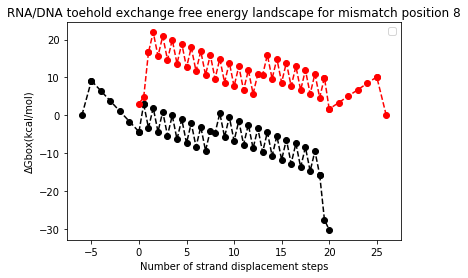

No handles with labels found to put in legend.


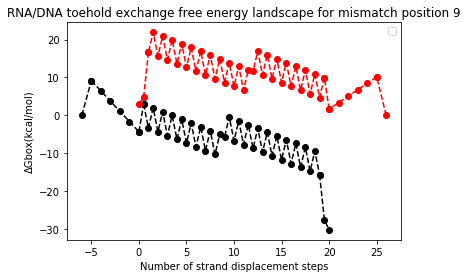

No handles with labels found to put in legend.


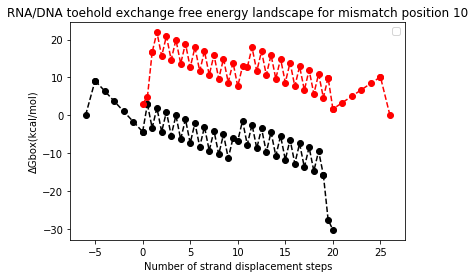

No handles with labels found to put in legend.


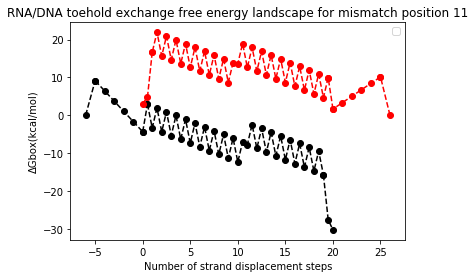

No handles with labels found to put in legend.


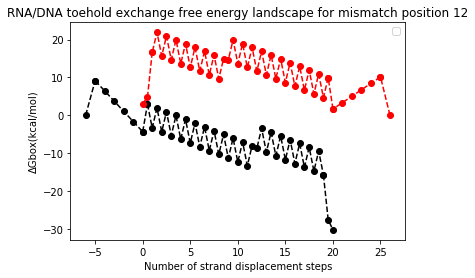

No handles with labels found to put in legend.


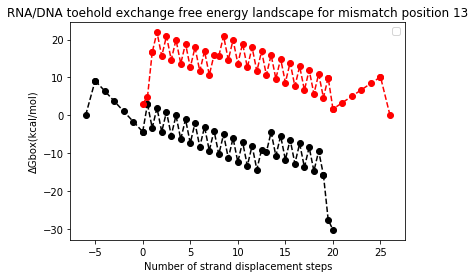

No handles with labels found to put in legend.


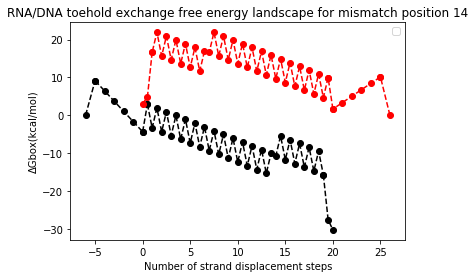

No handles with labels found to put in legend.


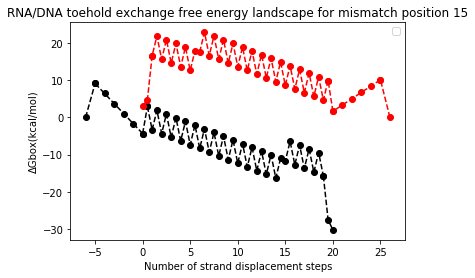

No handles with labels found to put in legend.


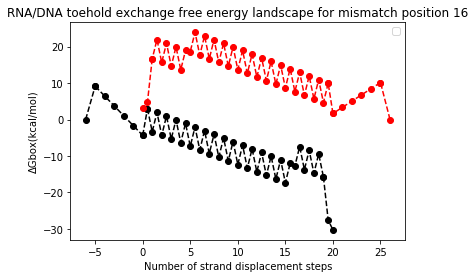

No handles with labels found to put in legend.


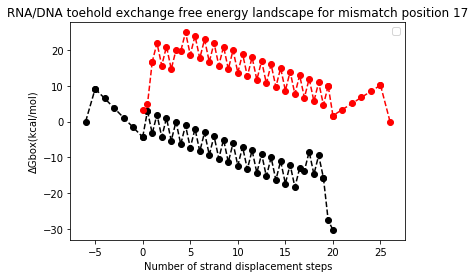

No handles with labels found to put in legend.


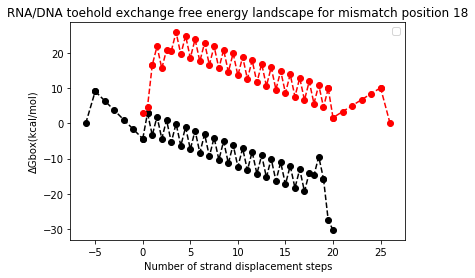

No handles with labels found to put in legend.


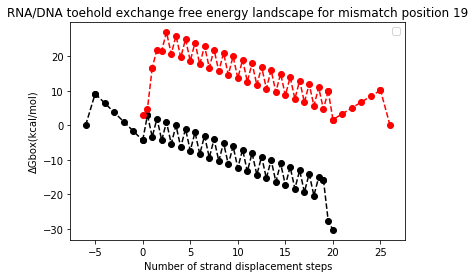

In [4]:
for m in range (1, 20):
    dGboxA = 0 
    dGboxB1 = dGassoc + dGvol + dGbp + dGrd
    dGboxBr = np.empty(g)
    for to in range(g):
        #hybridisation of each base pair in the toehold is associated with dGbp as for DNA/DNA and now also an addition -1 for dGrd
        dGboxBr[to] = dGboxB1 + (dGbp + dGrd)*to
    dGboxC1 = dGassoc + dGvol + (dGbp + dGrd)*g 
    dGboxCh1 = dGboxC1 + dGp + dGs
    dGboxCr = np.empty(m)
    dGboxCh = np.empty(m)
    dGboxCham = np.empty(b-m-1)
    dGboxCram = np.empty(b-m-1)
    for br in range(m):
        dGboxCh[br] = dGboxCh1 + dGrd*br
        dGboxCr[br] = dGboxCh[br] - dGs + dGrd
        dGboxCrm = dGboxCr[m-1] + dGs + (dGmm - dGs)
    for br in range(m, b-1):   
        dGboxCham[br-m] = dGboxCrm + dGs + dGrd*(br-m)
        dGboxCram[br-m] = dGboxCham[br-m] - dGs + dGrd
    dGboxD = dGboxCrm + dGrd*(b-m-1)
    dGboxE = dGboxD - dGassoc - dGvol 
    dGboxF = dGboxE + dGbp + dGrd

    dGboxC = np.empty(b*2)
    dGboxC[0:m*2] = [i for j in zip(dGboxCh, dGboxCr) for i in j]
    dGboxC[m*2-1] = dGboxCrm
    dGboxC[m*2:(b-1)*2] = [i for j in zip(dGboxCham, dGboxCram) for i in j]
    dGboxAB1 = [dGboxA, dGboxB1] 
    dGboxC1Ch1 = [dGboxC1, dGboxCh1]
    
    dGboxAinc= 0
    dGboxB1inc = dGassoc + dGvol + dGbp
    dGboxBrinc = np.empty(g2)
    for to in range(g2): 
        dGboxBrinc [to] = dGboxB1inc + dGbp*to
    dGboxC1inc = dGassoc + dGvol + dGbp*g2
    dGboxCh1inc = dGboxC1inc + dGp + dGs - dGrd
    dGboxCrinc = np.empty(m-1)
    dGboxChinc = np.empty(m-1)
    dGboxCrincam = np.empty(b-m)
    dGboxChincam = np.empty(b-m)
    for br in range(m-1): 
        dGboxChinc[br] = dGboxCh1inc - dGrd*br
        dGboxCrinc[br] = dGboxChinc[br] - dGs
        dGboxChincm = dGboxCrinc[m-2] + dGmm - (dGs) #- dGrd)
    for br in range(m-1, b-1): 
        dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
        dGboxCrincam[br-(m-1)] = dGboxChincam[br-(m-1)] - dGs
    dGboxDinc = dGboxChincm - dGs - (dGrd)*(b-m -1)
    dGboxEinc = dGboxDinc - dGvol - dGassoc
    dGboxFinc = dGboxEinc + dGbp
    
    
    dGboxCinc = np.empty(b*2)
    dGboxCinc[0:(m-1)*2] = [i for j in zip(dGboxChinc, dGboxCrinc) for i in j]
    dGboxCinc[(m-1)*2:(b-1)*2] = [i for j in zip(dGboxChincam, dGboxCrincam) for i in j]
    dGboxAB1inc = [dGboxAinc, dGboxB1inc] 
    dGboxC1Ch1inc = [dGboxC1inc, dGboxCh1inc]
    
    plt.figure()
    plt.plot(range(-g,-g+2), dGboxAB1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black' )
    plt.plot(range(-g+1,1), dGboxBr, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(np.arange(0, 1, 0.5), dGboxC1Ch1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(np.arange(0.5, b-0.5, 0.5), dGboxC[0:(b-1)*2], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot([b-1, b-0.5, b], [dGboxD, dGboxE, dGboxF],'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')

    plt.plot(range(b+g2,b+g2-2, -1), dGboxAB1inc, 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red' )
    plt.plot(range(b+g2-1,b-1, -1), dGboxBrinc, 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
    plt.plot(np.arange(b, b-1, -0.5), dGboxC1Ch1inc, 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
    plt.plot(np.arange(b-0.5, 0.5, -0.5), dGboxCinc[0:(b-1)*2], 'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')
    plt.plot([1, 0.5, 0], [dGboxDinc, dGboxEinc, dGboxFinc],'r--', marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')

    plt.xlabel('Number of strand displacement steps')
    plt.ylabel('\u0394Gbox(kcal/mol)')
    plt.title('RNA/DNA toehold exchange free energy landscape for mismatch position ' + str(m))
    plt.legend()
    plt.show()
